 # Part 3: FULL BAYESIAN + PREDICTIVE DISTRIBUTION

Write a program in python to implement the full Bayesian inference on Gaussian variables for curve fitting problem. Follow the instructions below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate 50 2D-data points using the following function:  . Add Gaussian random noise to the data. Show the original curve line and the noisy data. 

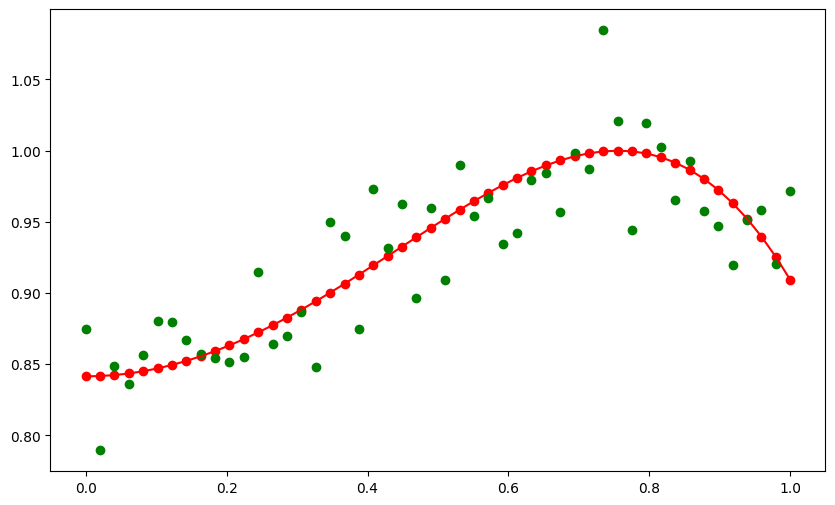

In [2]:
np.random.seed(5027)
x = np.linspace(0, 1, 50)
y = np.sin(x * x + 1)

noise = np.random.normal(0, 0.03, 50)
y_noise = y + noise

y_line = np.sin(x * x + 1)

plt.figure(figsize=(10, 6))
plt.plot(x, y_line, color = "r")
plt.scatter(x, y, color = "r")
plt.scatter(x, y_noise, color = "g")
plt.show()

Compute w based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of w.

In [3]:
def basis_function(x, mu, sigma):
    a = np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return a

In [4]:
alpha = 1
beta = 1
M = 3
sigma = 0.1
phi = np.zeros((50, M))
mu = np.linspace(0, 1, M)
for i in range(50):
    for j in range(M):
        phi[i, j] = basis_function(x[i], mu[j], sigma)
     
S = np.linalg.inv(alpha * np.eye(M) + beta * phi.T @ phi)
m = beta * (S @ phi.T @ y_noise)
w = beta * (S @ phi.T @ y_noise)

#for j in range(50):
#    for i in range(M):
#        phi[j, i] = basis_function(x, mu, sigma)
print(w)

[0.96352307 1.19326473 1.08127879]


Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.

In [5]:
alpha_trial = [0.01, 0.1, 1, 3, 5]
beta_trial = [0.1, 1, 3, 5, 15] 
M = 5

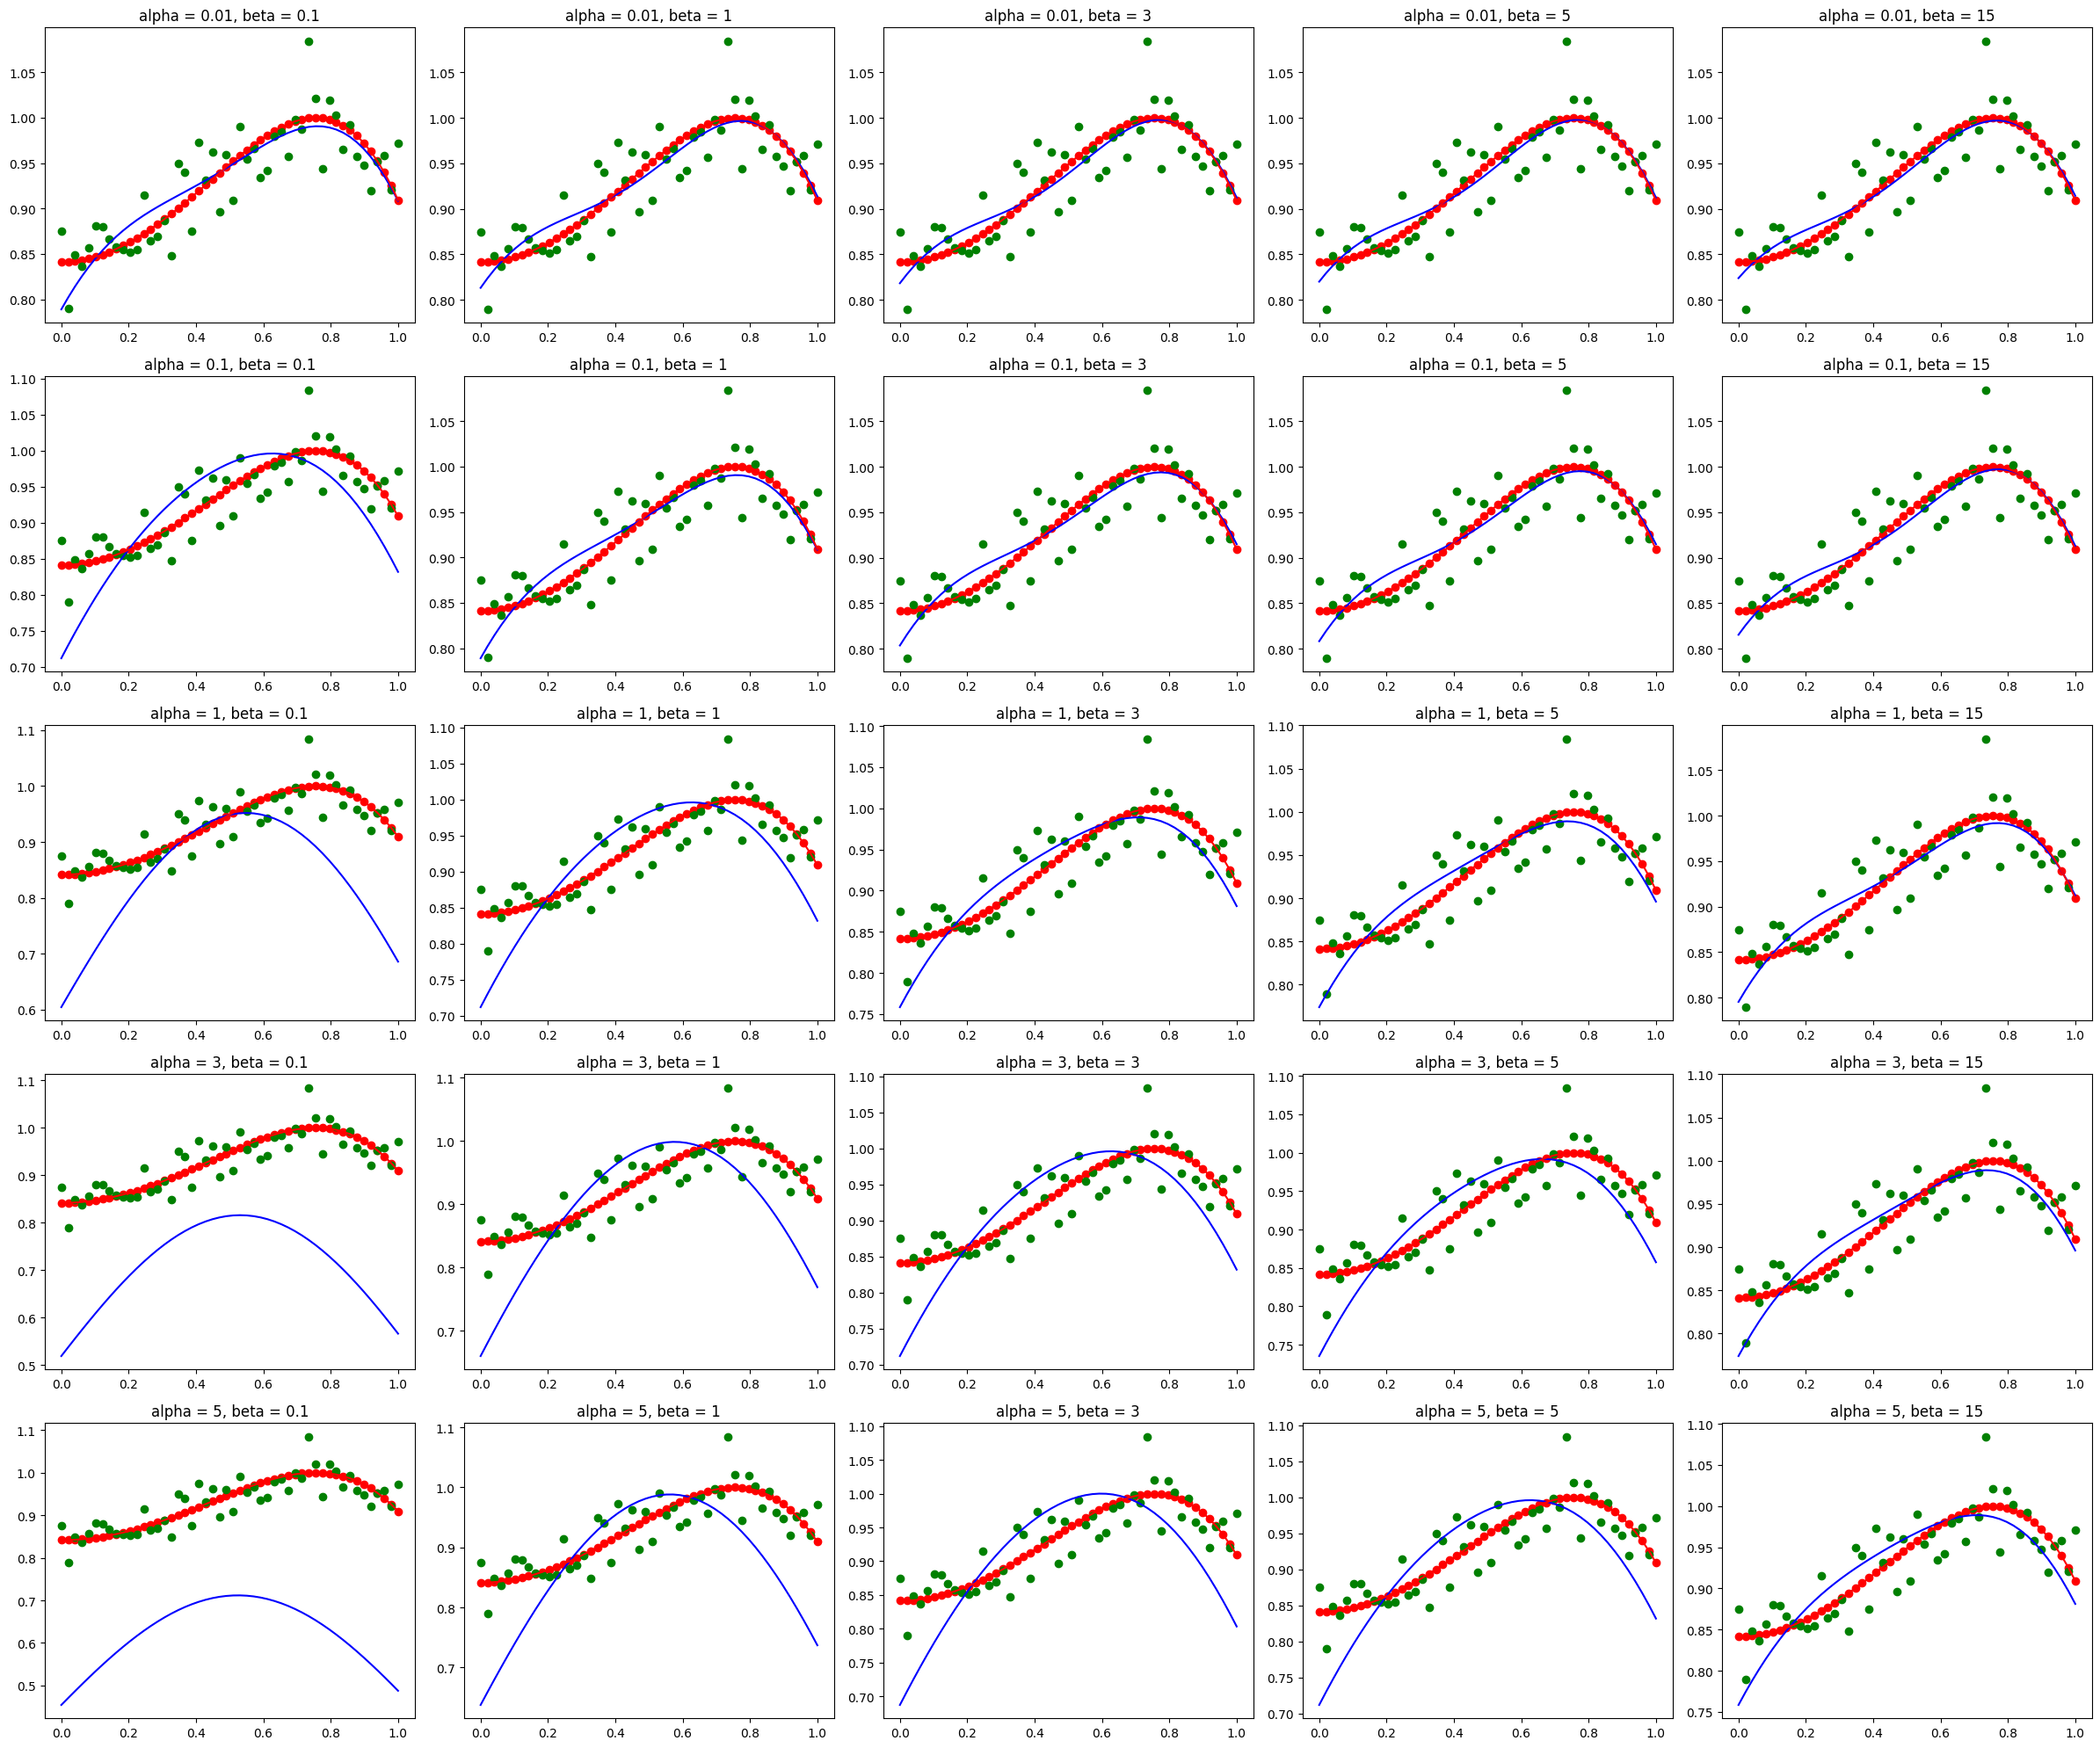

In [6]:
fig, axs = plt.subplots(5, 5, figsize=(24, 20))
M = 5
sigma = 1
for i, alpha in enumerate(alpha_trial):
    for j, beta in enumerate(beta_trial):
        sigma = 0.4
        phi = np.zeros((50, M))
        mu = np.linspace(0, 1, M)
        for k in range(50):
            for l in range(M):
                phi[k, l] = basis_function(x[k], mu[l], sigma)
     
        S = np.linalg.inv(alpha * np.eye(M) + beta * phi.T @ phi)
        m = beta * (S @ phi.T @ y_noise)
        w = beta * (S @ phi.T @ y_noise)
        y_pred = phi @ w
            
        axs[i, j].plot(x, y_pred, color = "b")
        axs[i, j].plot(x, y_line, color = "r")
        axs[i, j].scatter(x, y, color = "r")
        axs[i, j].scatter(x, y_noise, color = "g")
        axs[i, j].set_title(f"alpha = {alpha}, beta = {beta}")
        
plt.tight_layout()
plt.show()

Alpha is the precision of prior distribution. If the alpha is higher, prior distribution on w should be more precise and the value of w is smaller. If the alpha is lower, prior distribution on w should be less precise and the value of w is bigger. Accordingly, the prior could be strengthened and the model could be biased to small w when increading alpha. The prior could be weakened and the model could be biased to the original data, which could caused overfitting when decreading alpha. 
Beta is the precision of likelihood and inverse noise variance. If the beta is higher, the data should be less uncertain and we could be more confident about the model prediction. If the beta is lower, the data should be more uncertain and we could be less confident about the model prediction. Accordingly, the noise could be reduced, and could cause the problem of overfitting when increasing beta. The model could not always be precise, failed to fit in the data, and could be robust to the noise when decreading beta.  

Show your best fitting: 

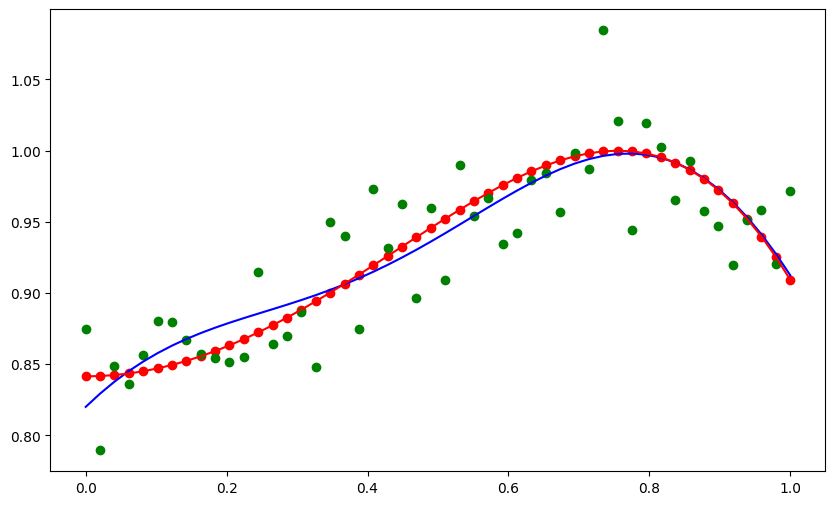

In [7]:
alpha = 0.01
beta = 5

M = 5
sigma = 0.4
phi = np.zeros((50, M))
mu = np.linspace(0, 1, M)
for i in range(50):
    for j in range(M):
        phi[i, j] = basis_function(x[i], mu[j], sigma)
     
S = np.linalg.inv(alpha * np.eye(M) + beta * phi.T @ phi)
m = beta * (S @ phi.T @ y_noise)
w = beta * (S @ phi.T @ y_noise)

y_pred = phi @ w

plt.figure(figsize = (10,6))
plt.plot(x, y_pred, color = "b")
plt.plot(x, y_line, color = "r")
plt.scatter(x, y, color = "r")
plt.scatter(x, y_noise, color = "g")
plt.show()

Explain how useful p(w|t) for the training and testing stages.

P(w|t) is the posterior distribution of model parameters w given the trained data outcome t. 

In training stage, p(w|t) could estimate the model parameters w, and interpret the uncertainty of model with certain parameters given that dataset. Accordingly, we could see the what parameter it is and how uncertain the parameter is. P(w|t) could interpret the prior with regards to model parameters, and then prevent overfitting accordingly. P(w|t) could help select model by comparing different models.

In testing Stage, p(w|t) could help compare and select model by evaluating the uncertainty. P(w|t) could interpret the prior with regards to model parameters, and then prevent overfitting accordingly. P(w|t) could estimate the model parameters w, and interpret the uncertainty of model with certain parameters given that dataset. Additionally, p(w|t)compute predictive distribution p(t*|x*, t, alpha, beta) in testing data. P(w|t) could also help avoid overfitting in testing stage. 

Generate 50 2D-data points using the following function:  . Add Gaussian random noise to the data. Show the original curve line and the noisy data. 

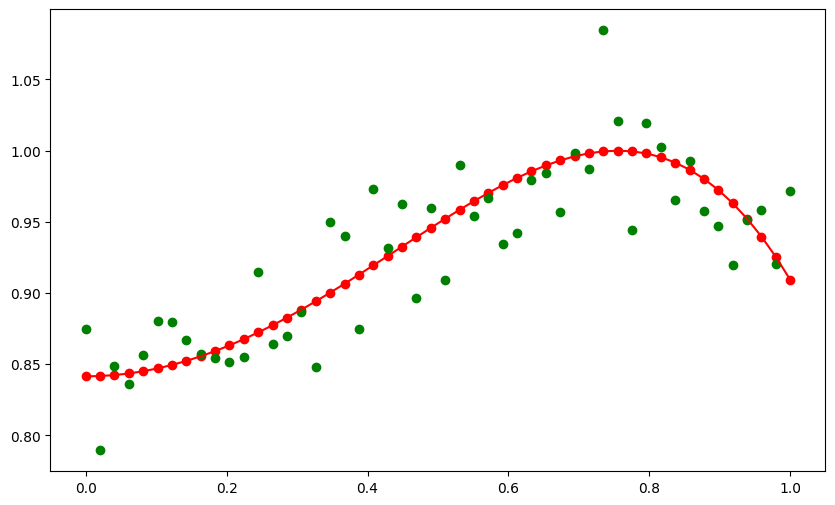

In [8]:
np.random.seed(5027)
x = np.linspace(0, 1, 50)
y = np.sin(x * x + 1)

noise = np.random.normal(0, 0.03, 50)
y_noise = y + noise

y_line = np.sin(x * x + 1)

plt.figure(figsize = (10,6))
plt.plot(x, y_line, color = "r")
plt.scatter(x, y, color = "r")
plt.scatter(x, y_noise, color = "g")
plt.show()

Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by one: 

In [9]:
alpha = 5
s = 0.1
beta = 10
a = np.random.permutation(50)
S = 0.1
mu = np.linspace(0, 1, 10)
S0 = alpha * np.eye(10)
m0 = np.zeros(10)
aa = []

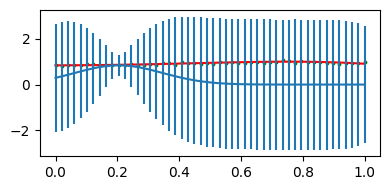

[10]
[6.56987924e-02 3.42191421e-01 5.18578874e-01 2.28662262e-01
 2.93364896e-02 1.09510501e-03 1.18942582e-05 3.75883212e-08
 3.45622868e-11 9.24668331e-15]
1


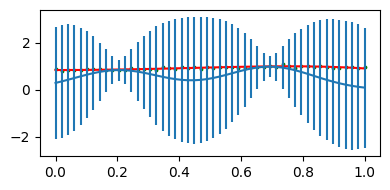

[10, 34]
[0.06551012 0.34120875 0.51709874 0.2289331  0.05673333 0.23800501
 0.59427387 0.43371152 0.09209962 0.00569048]
2


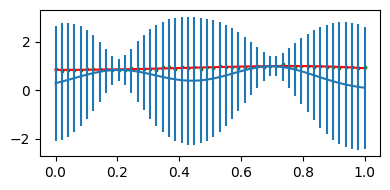

[10, 34, 35]
[0.06553012 0.34131289 0.51725502 0.22887022 0.05374049 0.22211169
 0.58582589 0.45631289 0.10456263 0.00705454]
3


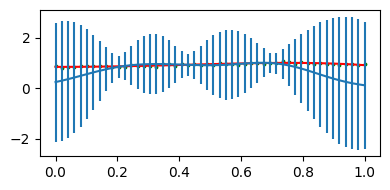

[10, 34, 35, 21]
[0.05221142 0.2742266  0.45751318 0.42614365 0.41868273 0.33893907
 0.53000281 0.4533594  0.11798615 0.00898594]
4


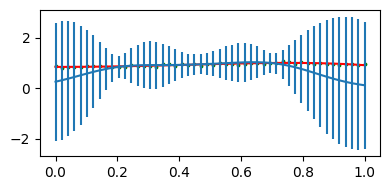

[10, 34, 35, 21, 24]
[0.05616539 0.29361246 0.46827518 0.36888177 0.42548285 0.41520997
 0.51246297 0.44073112 0.1219496  0.00979588]
5


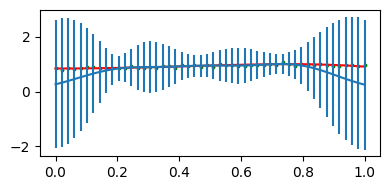

[10, 34, 35, 21, 24, 37]
[0.05859766 0.30540285 0.47316717 0.33464164 0.45568386 0.42127215
 0.37289416 0.57764465 0.29732677 0.04135579]
6


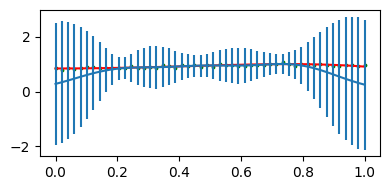

[10, 34, 35, 21, 24, 37, 11]
[0.06565076 0.32130358 0.4615441  0.32564597 0.46394716 0.41628431
 0.37412687 0.57812231 0.29604317 0.04109742]
7


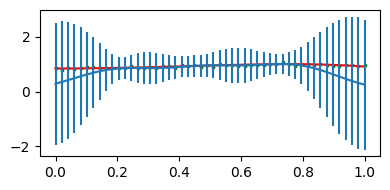

[10, 34, 35, 21, 24, 37, 11, 19]
[0.06535344 0.33631828 0.47570933 0.2755171  0.47948733 0.42238937
 0.3691512  0.5806649  0.29619211 0.04100041]
8


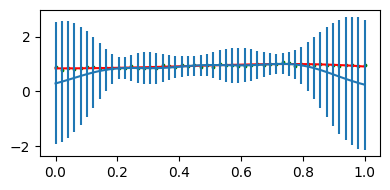

[10, 34, 35, 21, 24, 37, 11, 19, 22]
[0.06587064 0.34419158 0.47831797 0.25650429 0.5048358  0.41093868
 0.36988952 0.58406108 0.29179172 0.04001997]
9


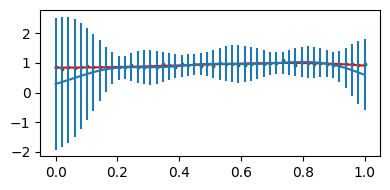

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44]
[0.06617908 0.34123764 0.47311222 0.2737327  0.48359141 0.42687102
 0.40417177 0.46871151 0.51824012 0.27836842]
10


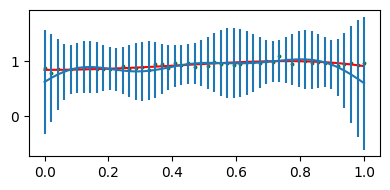

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4]
[0.32743322 0.49033503 0.34989078 0.2952928  0.4937267  0.40862401
 0.41187268 0.46661796 0.51734531 0.28058882]
11


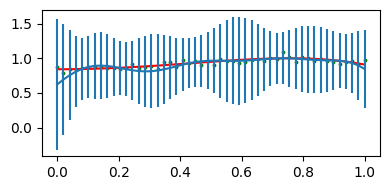

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47]
[0.32475896 0.49139478 0.35376481 0.28410385 0.51115357 0.38352689
 0.43580216 0.49576659 0.32627149 0.62565255]
12


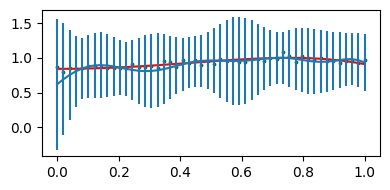

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49]
[0.32338861 0.49171406 0.35642213 0.27745638 0.51861831 0.37969325
 0.41588459 0.55283232 0.19618988 0.77732716]
13


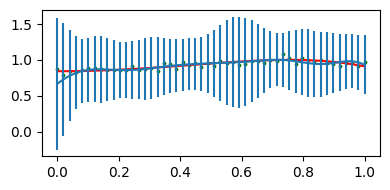

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17]
[0.39992446 0.4394283  0.31828233 0.42841306 0.40815055 0.43997357
 0.40159818 0.55050415 0.20007691 0.77503341]
14


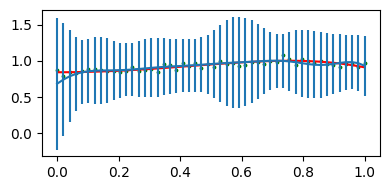

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12]
[0.44021735 0.39137304 0.35583521 0.43555521 0.38581949 0.46477098
 0.39178152 0.55332574 0.19969091 0.77490285]
15


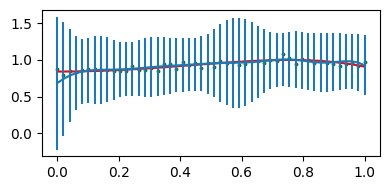

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40]
[0.44082134 0.39052535 0.35685901 0.43472261 0.38402316 0.47655067
 0.34754842 0.6006012  0.19666799 0.7682902 ]
16


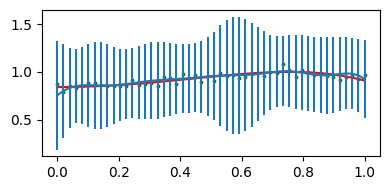

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2]
[0.54811879 0.31685985 0.38910251 0.42825135 0.38082865 0.48303551
 0.34463634 0.60165059 0.19638058 0.76834089]
17


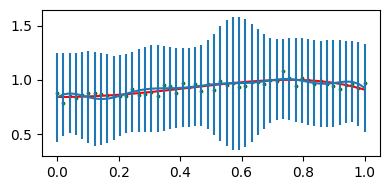

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0]
[0.70910862 0.1609071  0.47215926 0.39957835 0.38616347 0.48763862
 0.34172359 0.6031207  0.19571825 0.76859352]
18


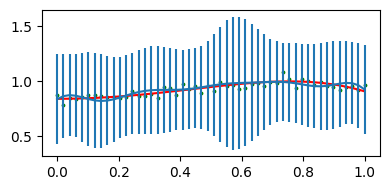

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38]
[0.70856482 0.16253069 0.46805434 0.40686655 0.37773674 0.49006333
 0.37527992 0.55072836 0.22501061 0.75678509]
19


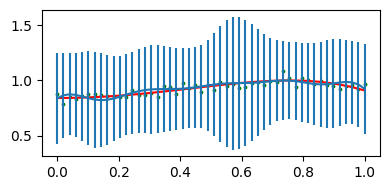

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39]
[0.70877138 0.16203257 0.46906347 0.40542146 0.37821167 0.49487096
 0.35081811 0.5796584  0.21630709 0.75772919]
20


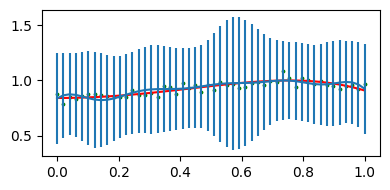

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41]
[0.70877989 0.16199748 0.46917257 0.40519917 0.37856835 0.49435408
 0.35128757 0.57982253 0.21484105 0.75875593]
21


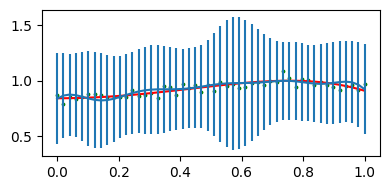

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42]
[0.70865479 0.16241726 0.46801333 0.40739579 0.37554247 0.49724594
 0.35421049 0.56909123 0.23543698 0.74631846]
22


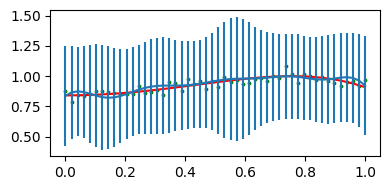

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32]
[0.70862358 0.16253231 0.46767683 0.40805106 0.37460304 0.49822596
 0.35473219 0.56835899 0.23603157 0.74600437]
23


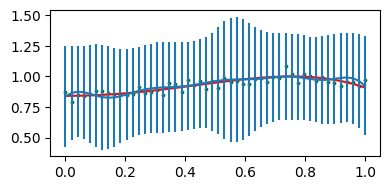

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15]
[0.70344498 0.16754741 0.47589317 0.37932693 0.40023435 0.47965339
 0.3639439  0.56407014 0.23802616 0.74523762]
24


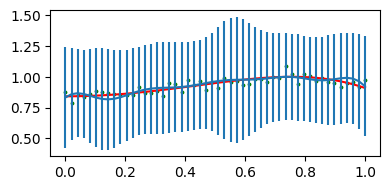

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3]
[0.7115773  0.14323431 0.49209597 0.37104099 0.40399828 0.47835871
 0.36433809 0.56397927 0.23801979 0.74525699]
25


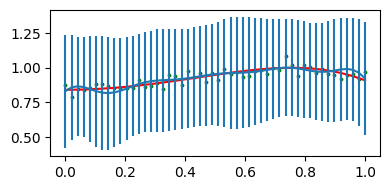

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27]
[0.71158742 0.14234264 0.49600127 0.36186745 0.42199825 0.45032449
 0.3777372  0.55900578 0.2394453  0.74504056]
26


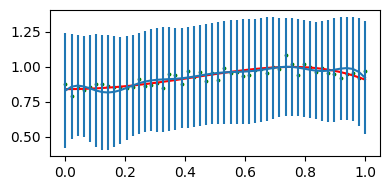

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28]
[0.71153008 0.14253776 0.49545388 0.36295454 0.42017332 0.45276168
 0.37690437 0.5590824  0.2396047  0.74490866]
27


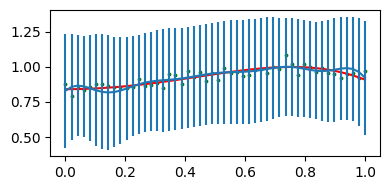

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13]
[0.70493032 0.15287142 0.486903   0.35837578 0.42745593 0.44688231
 0.38061712 0.55682999 0.24097287 0.74426663]
28


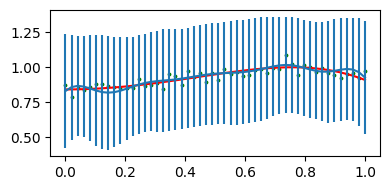

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36]
[0.70592222 0.15054389 0.49171813 0.35045693 0.43891333 0.43302973
 0.38798962 0.57837421 0.21524602 0.75945462]
29


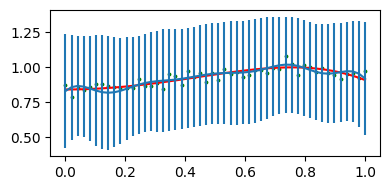

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45]
[0.70572123 0.151266   0.48962573 0.35477066 0.43048032 0.44879925
 0.36148774 0.61399221 0.17644477 0.7712388 ]
30


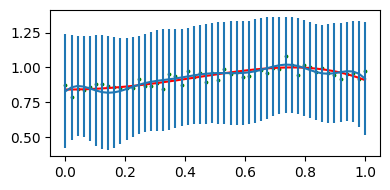

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20]
[0.7022233  0.15681119 0.48453008 0.35414951 0.44872752 0.43213724
 0.37191189 0.60772743 0.18014536 0.76945275]
31


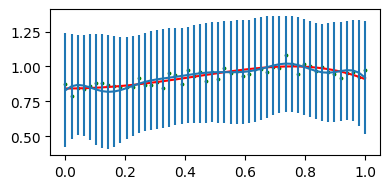

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18]
[0.70035643 0.16100176 0.47654985 0.36431038 0.44460937 0.43260829
 0.37266702 0.60684084 0.18085726 0.76904883]
32


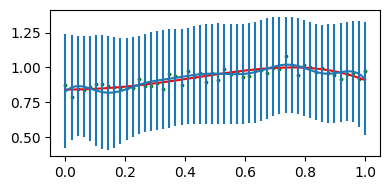

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29]
[0.7013759  0.15861989 0.48143784 0.35644801 0.45531326 0.42105302
 0.37208571 0.61104077 0.17669926 0.77158291]
33


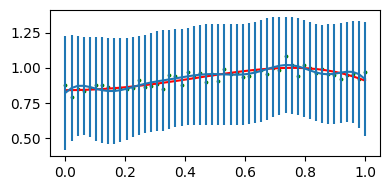

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5]
[0.67300766 0.2033679  0.45882054 0.36463694 0.45304436 0.42107007
 0.37273215 0.61037967 0.17720862 0.77129895]
34


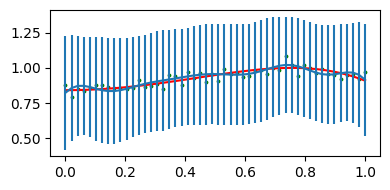

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46]
[0.67289062 0.20366675 0.45815647 0.36583218 0.45101593 0.42455104
 0.36752432 0.61658622 0.17193735 0.76975259]
35


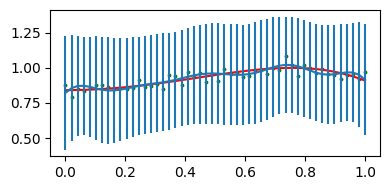

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16]
[0.67376201 0.19707053 0.48013196 0.32612251 0.4812847  0.40756693
 0.3759989  0.61226243 0.17417046 0.76873627]
36


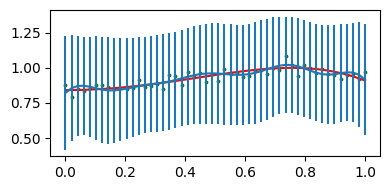

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14]
[0.67182756 0.1996443  0.47904214 0.3223083  0.48571092 0.40432474
 0.37806799 0.61097493 0.17495355 0.76833522]
37


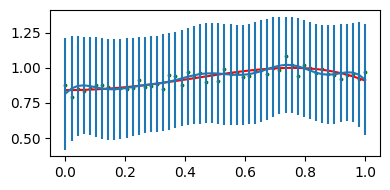

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7]
[0.65871003 0.21637507 0.47553735 0.3201903  0.48902617 0.40158165
 0.37997888 0.6097185  0.17574662 0.76791968]
38


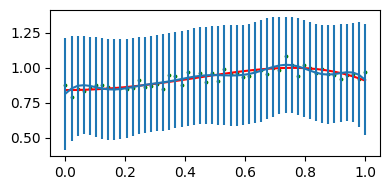

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23]
[0.65290712 0.22795988 0.45632718 0.34645186 0.46150857 0.40561596
 0.38608811 0.60243322 0.18160648 0.76446548]
39


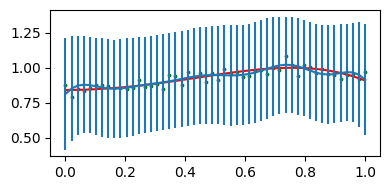

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6]
[0.64220987 0.24357683 0.44911179 0.34890107 0.46102123 0.40537548
 0.38649232 0.60208294 0.18186049 0.76432228]
40


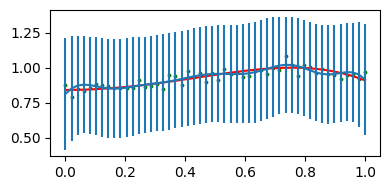

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6, 26]
[0.64308716 0.24234766 0.44993172 0.35061494 0.45207569 0.4278655
 0.36835128 0.61417734 0.17433908 0.76820322]
41


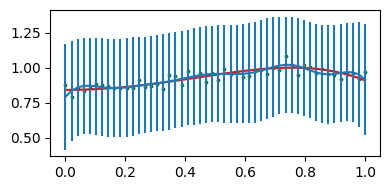

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6, 26, 1]
[0.60954946 0.26758342 0.43636708 0.35761794 0.4484415  0.42969104
 0.36750619 0.61457874 0.17414656 0.76828528]
42


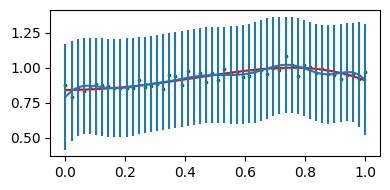

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6, 26, 1, 25]
[0.60734564 0.27168308 0.430512   0.36343026 0.44743031 0.41658809
 0.38146531 0.60396162 0.18131652 0.76439917]
43


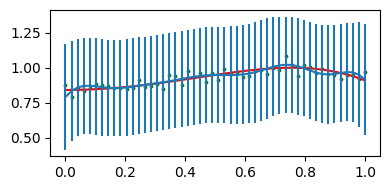

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6, 26, 1, 25, 8]
[0.60668733 0.27228497 0.43117606 0.36250896 0.44820948 0.41602426
 0.38183125 0.6037309  0.18145813 0.76432623]
44


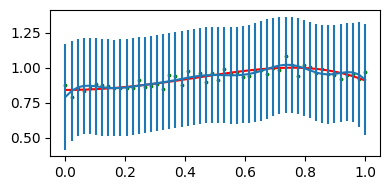

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6, 26, 1, 25, 8, 30]
[0.60742217 0.27087985 0.43331491 0.35973952 0.45104634 0.41519539
 0.37618175 0.60972067 0.17690028 0.7669308 ]
45


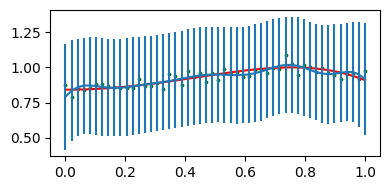

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6, 26, 1, 25, 8, 30, 33]
[0.60680935 0.27220471 0.43086285 0.36410724 0.44321704 0.42886488
 0.3557399  0.62303172 0.16969293 0.77018901]
46


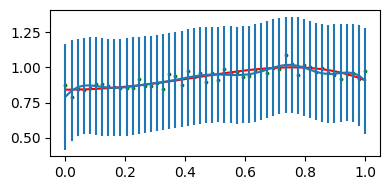

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6, 26, 1, 25, 8, 30, 33, 48]
[0.60692783 0.27195422 0.43131297 0.36333151 0.44457571 0.42644159
 0.36008462 0.61550871 0.18214411 0.7539739 ]
47


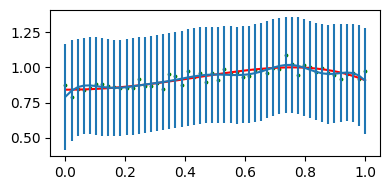

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6, 26, 1, 25, 8, 30, 33, 48, 9]
[0.60696302 0.27203241 0.43089817 0.36373183 0.44427946 0.42664066
 0.35995819 0.61558793 0.18209593 0.75399815]
48


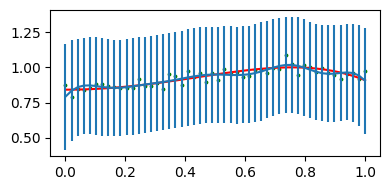

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6, 26, 1, 25, 8, 30, 33, 48, 9, 43]
[0.60697348 0.27200841 0.43094647 0.36363409 0.44448035 0.42622481
 0.36080792 0.61396495 0.18471248 0.75235872]
49


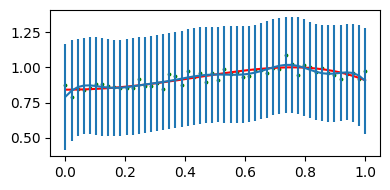

[10, 34, 35, 21, 24, 37, 11, 19, 22, 44, 4, 47, 49, 17, 12, 40, 2, 0, 38, 39, 41, 42, 32, 15, 3, 27, 28, 13, 36, 45, 20, 18, 29, 5, 46, 16, 14, 7, 23, 6, 26, 1, 25, 8, 30, 33, 48, 9, 43, 31]
[0.60651921 0.27282712 0.42982716 0.36485324 0.44387961 0.42427073
 0.36844394 0.60689594 0.189685   0.74968431]
50


In [10]:
for i, a in enumerate(a):
    
    phi_x0 = np.exp(-0.5 * (np.array([x[a]])[:, np.newaxis] - mu) ** 2 / s ** 2)
    phi_x0 = phi_x0.reshape(-1, 1)
    
    Sn_inv = np.linalg.inv(S0) + beta * phi_x0 @ phi_x0.T
    Sn = np.linalg.inv(Sn_inv)
    mn = Sn @ (beta * phi_x0 * y_noise[a] + np.linalg.inv(S0) @ m0.reshape(-1, 1))
    mn = mn.reshape(-1) #
    
    phi_x = np.exp(-0.5 * (x[:, np.newaxis] - mu) ** 2 / s ** 2)
    
    tt = phi_x @ mn
    
    sigma = np.array([np.sqrt(1 / beta + phi_x[i, :] @ Sn @ phi_x[i, :]) for i in range(50)])
    ###
    
    aa.append(a)
    
    plt.figure(figsize = (4, 2))
    
    plt.plot(x, y, color = "r")
    plt.scatter(x, y_noise, color = "g", s = 3)
    
    plt.errorbar(x, tt, sigma)
    
    plt.tight_layout()
    plt.show()
    
    
    print (aa)
    print (mn)
    print (i+1)
    
    m0, S0 = mn, Sn

Explain why the predictive distribution is better than the original form of the full Bayesian inference.

In stead of $\bar{w}$ and its probability, $p(\bar{w}|\bar{t})$, we are more interested in $t_{new}$ and its probability, which is not obtained in full bayesian. In predictive distribution, we use sequential learning or online learning. We can process once we have a new data, and update the old stored value of m and S. Accordingly, we can marginalize over all possible values of $\bar{w}$. We can intrapolate or extrapolate the prediction of t and know the uncertainty of the prediction. We can know the probability of all possible prices and know the most probable one. Consequently, we can know the uncertainty of the predictions of new data, and can easily and more clearly get the estimation of error. 

Discuss the differences between p(t_new|t) and p(w|t).

p(t_new|t) is the Predictive Distribution, which could provide the prediction of uncertainty and noise of new data based on previous ones. 
p(w|t) is posterior distribution of the parameter, that is, distribution of parameters given t, which is more for the estimation of parameter and model selection. It cannot provide prediction directly. 